##### **Name - Surname:** Ramazan Serhat Uygun
##### **Number:** 201401049

# **Question 2**

---

## **K-Means Algorithm** 

## Required Libraries

In [283]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import silhouette_score

## Loading the Data Set and Initial Exploration

In [61]:
file_path = 'Student_performance_data.csv'
data = pd.read_csv(file_path)

print("First 5 Rows of the Data Set:")
print("------------------------------")
print(data.head())
print("--------------------------------------------------------------------------------------")

print("\nGeneral Information of the Data Set:")
print("---------------------------------------")
print(data.info())
print("--------------------------------------------------------------------------------------")

print("\nNumber of Missing Values:")
print("----------------------------")
print(data.isnull().sum())
print("--------------------------------------------------------------------------------------")

First 5 Rows of the Data Set:
------------------------------
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass

## Data Visualization

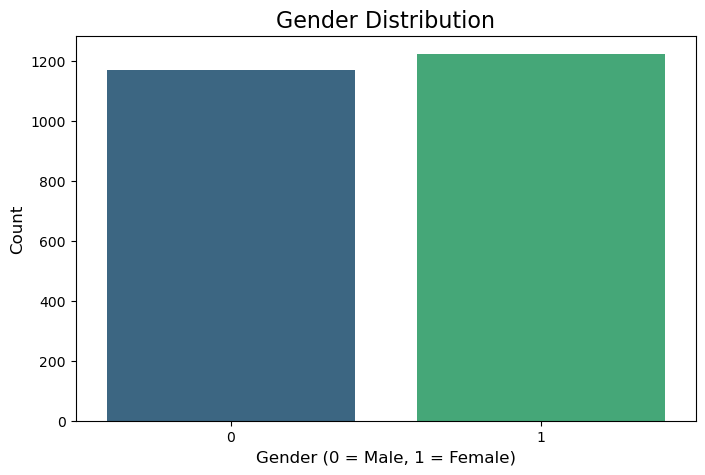

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Gender', hue='Gender', palette='viridis', dodge=False, legend=False) 
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender (0 = Male, 1 = Female)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

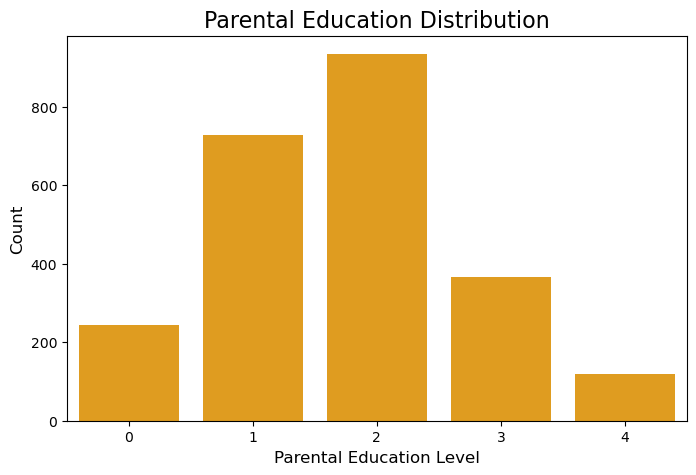

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='ParentalEducation', color='orange')
plt.title('Parental Education Distribution', fontsize=16)
plt.xlabel('Parental Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

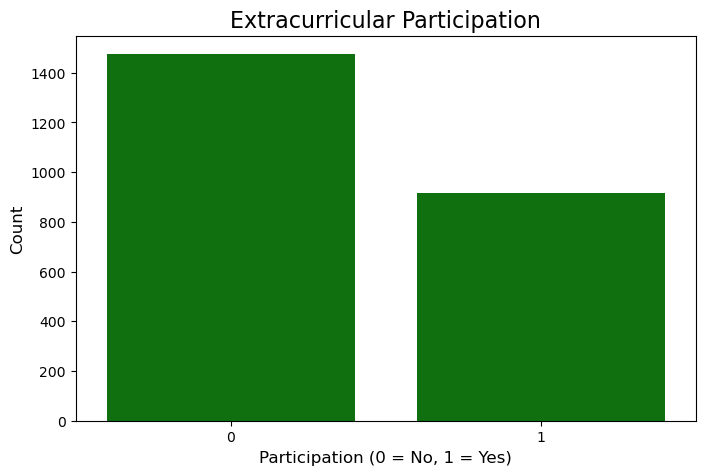

In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Extracurricular', color='green')
plt.title('Extracurricular Participation', fontsize=16)
plt.xlabel('Participation (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

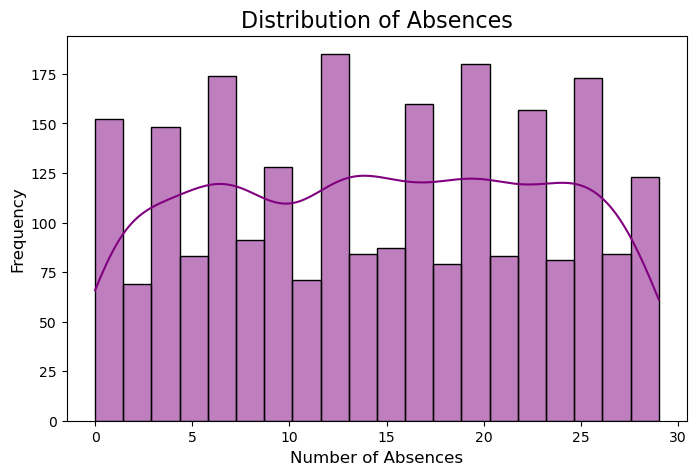

In [42]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Absences', bins=20, kde=True, color='purple')
plt.title('Distribution of Absences', fontsize=16)
plt.xlabel('Number of Absences', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

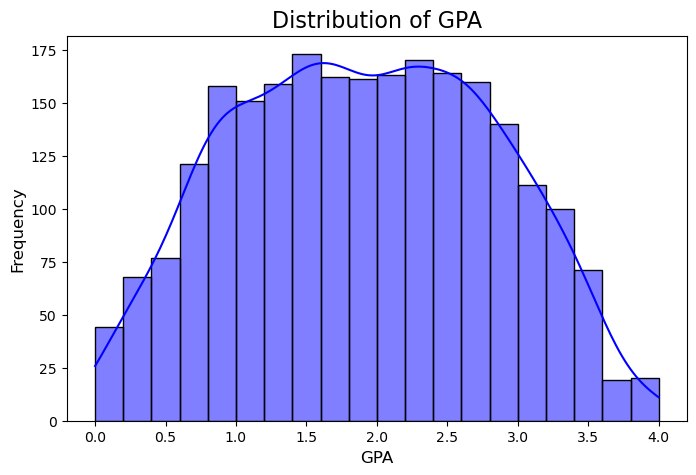

In [44]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='GPA', bins=20, kde=True, color='blue')
plt.title('Distribution of GPA', fontsize=16)
plt.xlabel('GPA', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

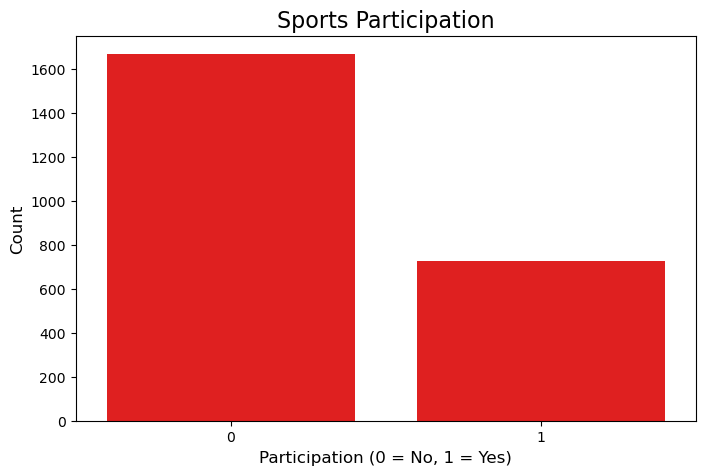

In [46]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Sports', color='red')
plt.title('Sports Participation', fontsize=16)
plt.xlabel('Participation (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## Standardization (Z-Score)

In [287]:
columns_to_standardize = ['StudyTimeWeekly', 'Absences', 'GPA']

scaler = StandardScaler()
data_standardized = data.copy()
data_standardized[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

print("First 5 rows of the standardized dataset:")
print("------------------------------------------")
print(data_standardized[columns_to_standardize].head())

First 5 rows of the standardized dataset:
------------------------------------------
   StudyTimeWeekly  Absences       GPA
0         1.780336 -0.890822  1.118086
1         0.997376 -1.717694  1.242374
2        -0.984045  1.353542 -1.960277
3         0.045445 -0.063951  0.161790
4        -0.902311  0.290422 -0.675573


## Normalization (Min-Max)

In [289]:
columns_to_normalize = ['StudyTimeWeekly', 'Absences', 'GPA']

normalizer = MinMaxScaler()
data_normalized = data.copy()
data_normalized[columns_to_normalize] = normalizer.fit_transform(data[columns_to_normalize])

print("First 5 rows of the normalized dataset:")
print("----------------------------------------")
print(data_normalized[columns_to_normalize].head())

First 5 rows of the normalized dataset:
----------------------------------------
   StudyTimeWeekly  Absences       GPA
0         0.992773  0.241379  0.732299
1         0.771270  0.000000  0.760729
2         0.210718  0.896552  0.028151
3         0.501965  0.482759  0.513555
4         0.233840  0.586207  0.322015


## Visualizing Standardized and Normalized Data

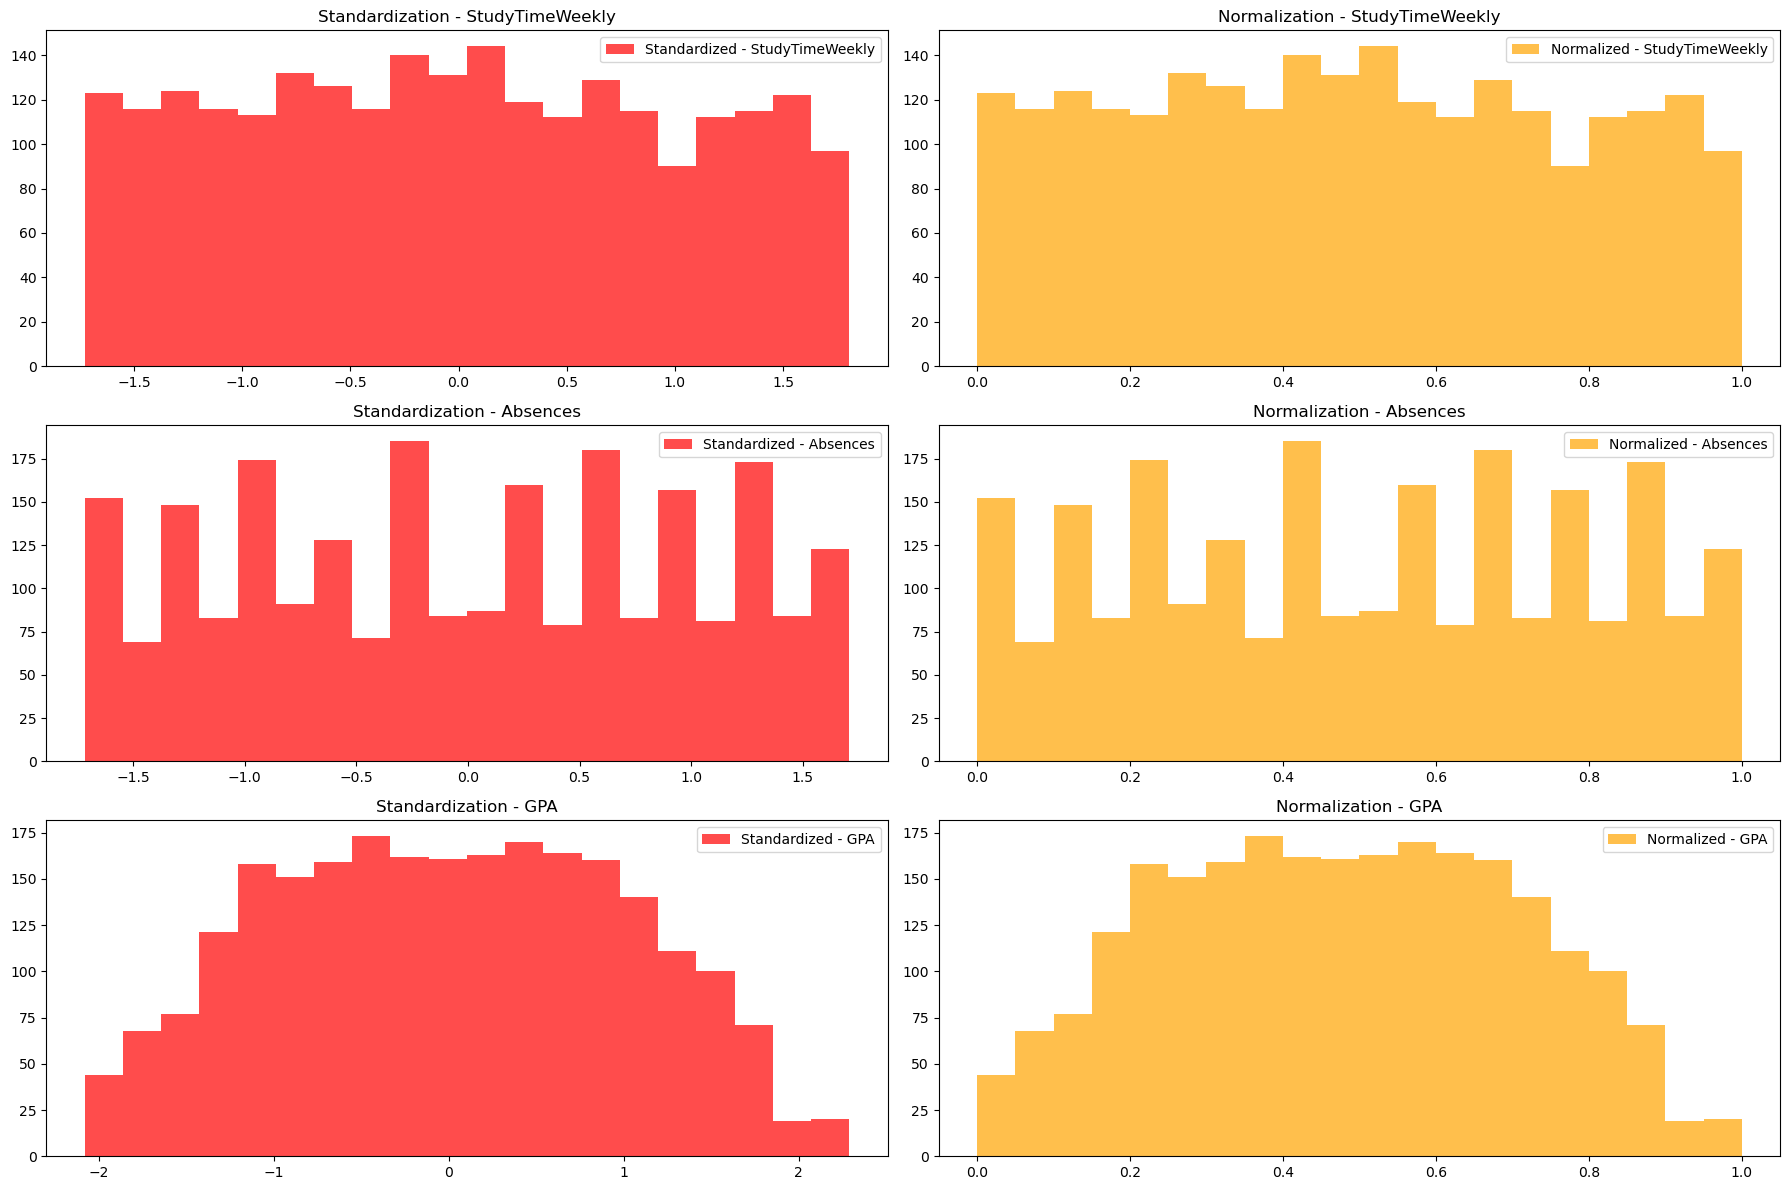

In [340]:
columns_to_visualize = ['StudyTimeWeekly', 'Absences', 'GPA']

plt.figure(figsize=(18, 12))

for i, col in enumerate(columns_to_visualize):
    plt.subplot(len(columns_to_visualize), 2, 2 * i + 1)
    plt.hist(data_standardized[col], bins=20, color='red', alpha=0.7, label=f'Standardized - {col}')
    plt.title(f'Standardization - {col}')
    plt.legend()

    plt.subplot(len(columns_to_visualize), 2, 2 * i + 2)
    plt.hist(data_normalized[col], bins=20, color='orange', alpha=0.7, label=f'Normalized - {col}')
    plt.title(f'Normalization - {col}')
    plt.legend()

plt.tight_layout()
plt.show()

## Determining the Number of Clusters with Elbow Method

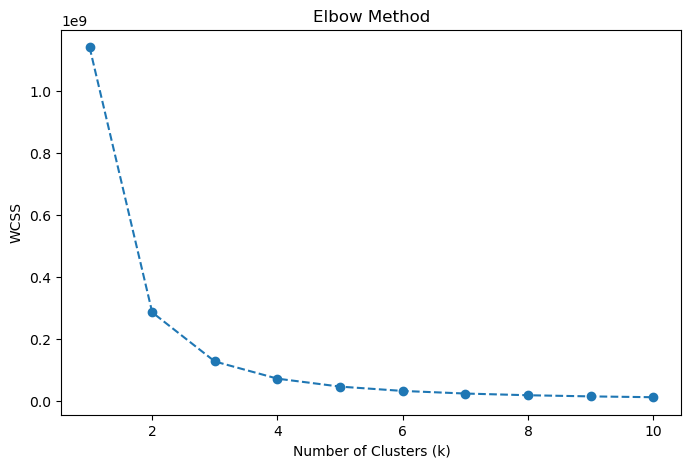

In [311]:
wcss = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_standardized)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

## Silhouette Score Calculation

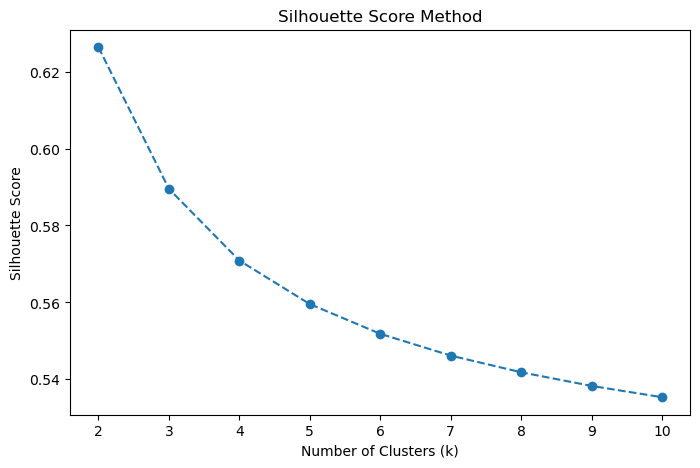

In [337]:
silhouette_scores = []
for k in range(2, 11): 
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_standardized)
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(data_standardized, cluster_labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

## Implementing the K-means Algorithm

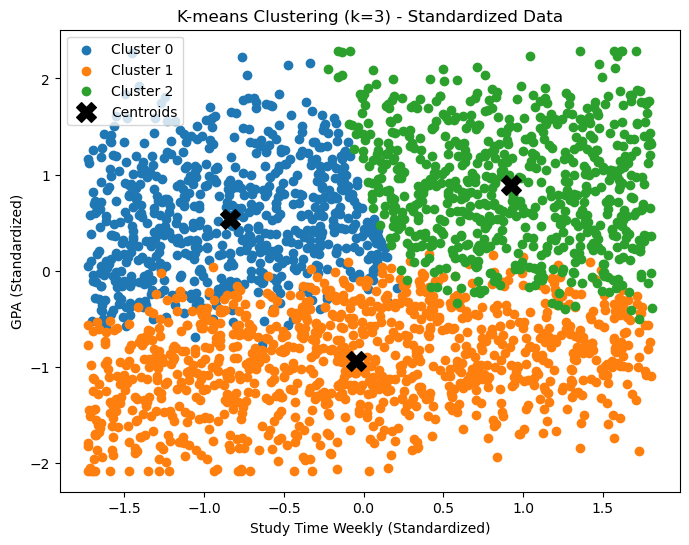

In [344]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(data_standardized[['StudyTimeWeekly', 'Absences', 'GPA']]) 

data['Cluster'] = kmeans.labels_

cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_data = data_standardized[kmeans.labels_ == cluster]  
    plt.scatter(
        cluster_data['StudyTimeWeekly'], 
        cluster_data['GPA'], 
        label=f'Cluster {cluster}'
    )

plt.scatter(
    cluster_centers[:, 0], cluster_centers[:, 2], 
    s=200, c='black', label='Centroids', marker='X'
)
plt.title('K-means Clustering (k=3) - Standardized Data')
plt.xlabel('Study Time Weekly (Standardized)')
plt.ylabel('GPA (Standardized)')
plt.legend()
plt.show()